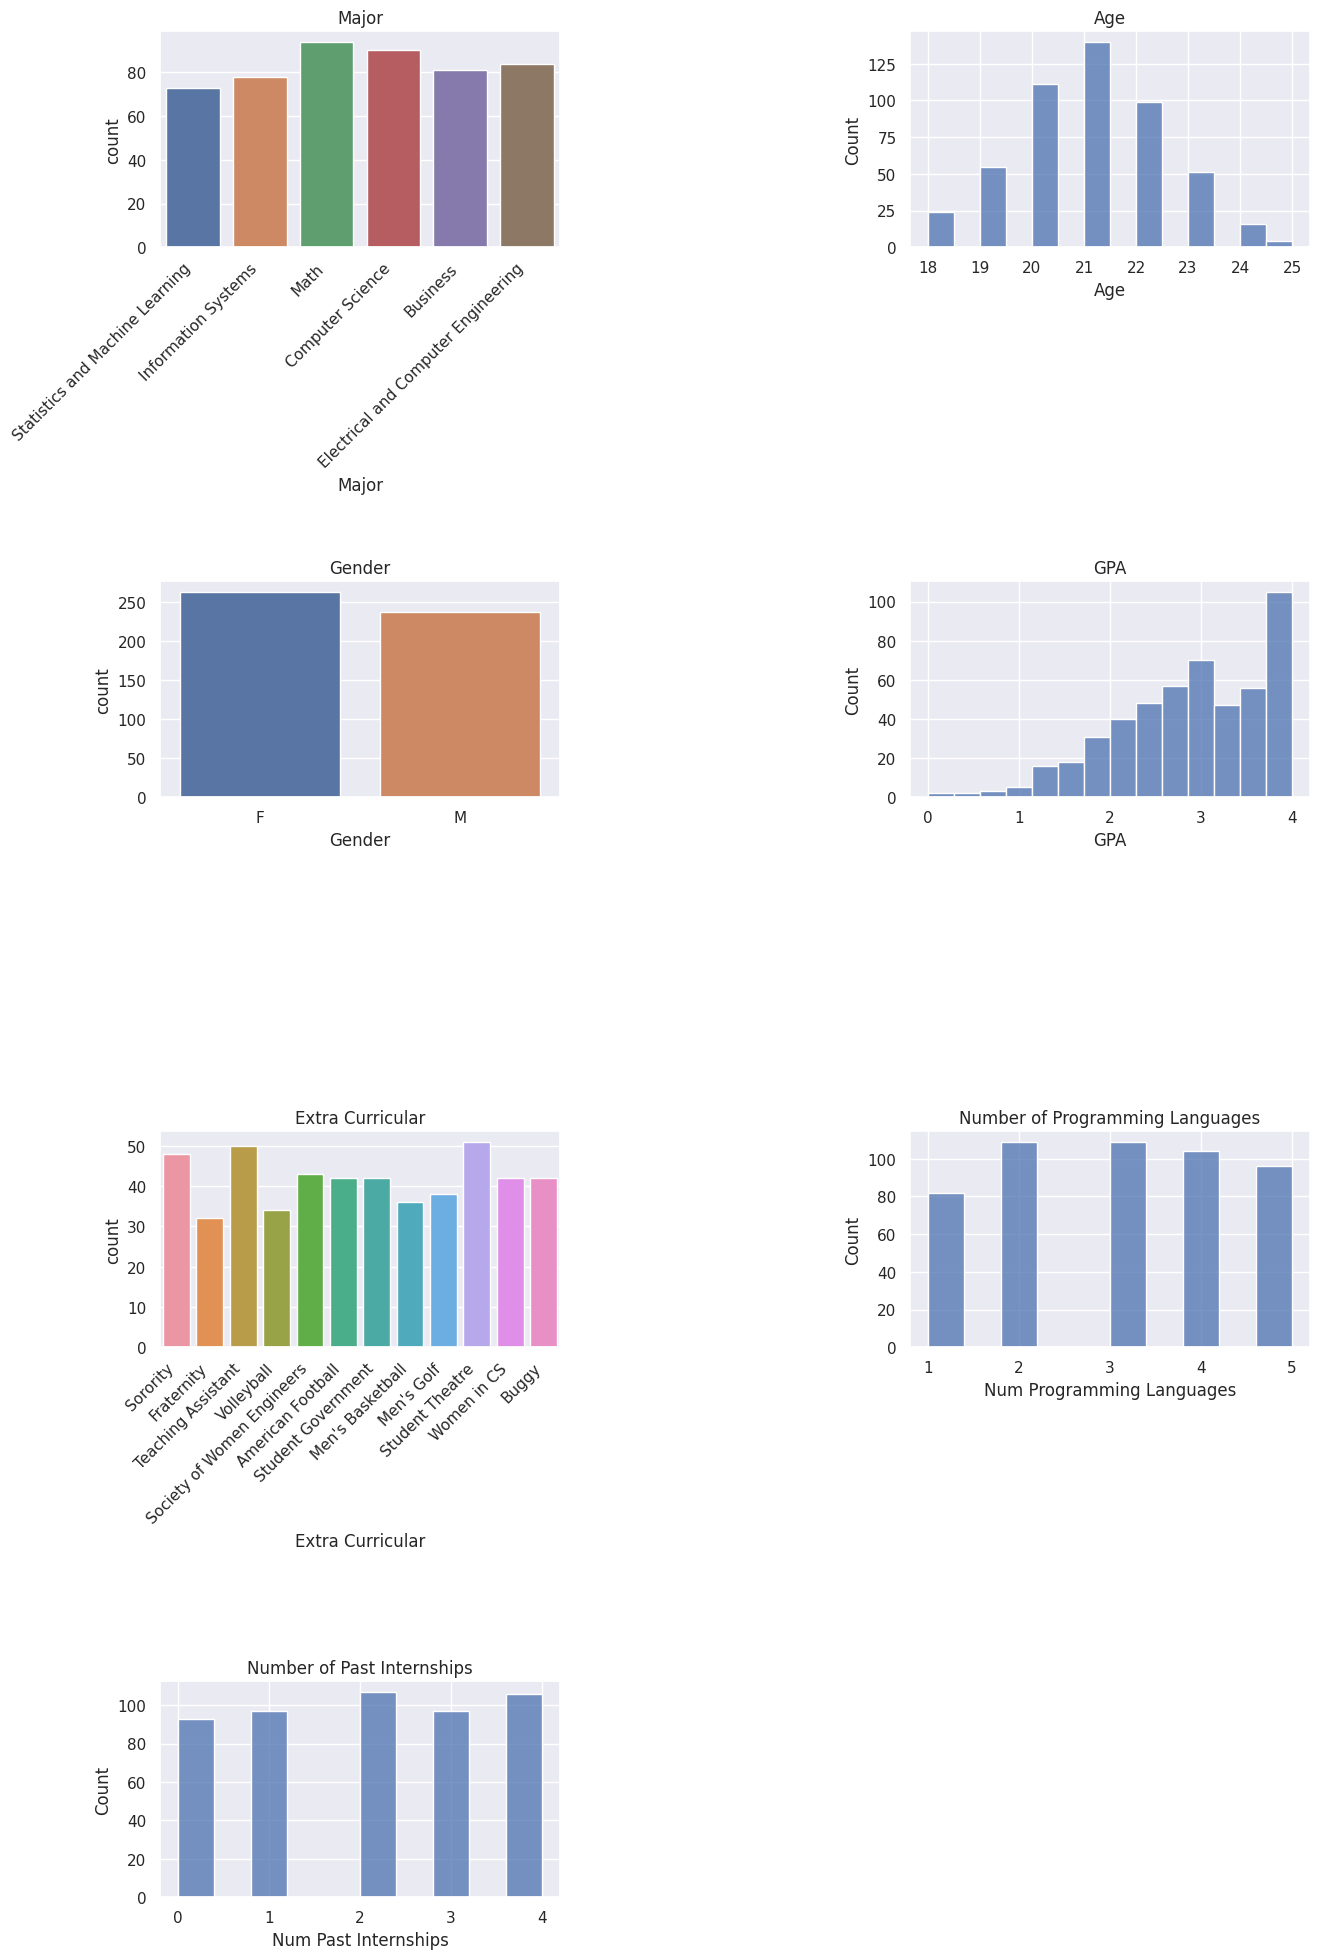

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

from predict import predict

filename = 'student_data.csv'
df = pd.read_csv(filename)

def plot_feature_distributions(df):
    features = [
        ("Major", "Major", "bar"),
        ("Age", "Age", "hist"),
        ("Gender", "Gender", "bar"),
        ("GPA", "GPA", "hist"),
        ("Extra Curricular", "Extra Curricular", "bar"),
        ("Num Programming Languages", "Number of Programming Languages", "hist"),
        ("Num Past Internships", "Number of Past Internships", "hist")
    ]

    sns.set(style="darkgrid")
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 25))
    fig.tight_layout(pad=18.0)

    for i, (feature, title, plot_type) in enumerate(features):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        if plot_type == "bar":
            sns.countplot(data=df, x=feature, ax=ax)
            
            # Rotate x-axis labels if the feature is 'major' or 'extra_curricular'
            if feature in ["Major", "Extra Curricular"]:
                ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        elif plot_type == "hist":
            sns.histplot(data=df, x=feature, ax=ax)
        elif plot_type == "dist":
            sns.displot(data=df, x=feature, kind="kde", ax=ax)

        ax.set_title(title)

    # Remove the unused subplot
    axes[3, 1].axis("off")

    plt.show()

def convert_keys(original_dict):
    key_mapping = {
        "Student ID": "student_id",
        "Major": "major",
        "Age": "age",
        "Gender": "gender",
        "GPA": "gpa",
        "Extra Curricular": "extra_curricular",
        "Num Programming Languages": "num_programming_languages",
        "Num Past Internships": "num_past_internships",
    }
    
    return {key_mapping.get(key, key): value for key, value in original_dict.items()}


def evaluate_model(data, predict):
    # Convert the feature keys to the desired format
    data = [convert_keys(entry) for entry in data]
    # print(data)

    # Separate the "Good Candidate" labels from the dictionaries
    actual_labels = np.array([entry.pop("Good Candidate") for entry in data], dtype=int)
    # print(actual_labels)
    # print(data)

    # Use the predict() function on each dictionary to get the predicted labels
    # for entry in data:
    #   print("predicting:", entry)
    #   print(predict(entry))
    predicted_labels = np.array([predict(entry)["good_employee"] for entry in data], dtype=int)
    # print(predicted_labels)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(actual_labels, predicted_labels)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(actual_labels, predicted_labels)

    return accuracy, conf_matrix

plot_feature_distributions(df)

In [3]:
df = pd.read_csv(filename, converters={i: str for i in range(0, 100)})
data = df.to_dict(orient='records')
# print(data)
accuracy, conf_matrix = evaluate_model(data, predict)

[{'student_id': '0', 'gender': 'F', 'age': '21', 'major': 'Statistics and Machine Learning', 'gpa': '2.83', 'extra_curricular': 'Sorority', 'num_programming_languages': '4', 'num_past_internships': '1', 'Good Candidate': '0'}, {'student_id': '1', 'gender': 'M', 'age': '20', 'major': 'Information Systems', 'gpa': '2.89', 'extra_curricular': 'Fraternity', 'num_programming_languages': '5', 'num_past_internships': '3', 'Good Candidate': '0'}, {'student_id': '2', 'gender': 'F', 'age': '20', 'major': 'Math', 'gpa': '2.66', 'extra_curricular': 'Teaching Assistant', 'num_programming_languages': '3', 'num_past_internships': '1', 'Good Candidate': '0'}, {'student_id': '3', 'gender': 'M', 'age': '20', 'major': 'Information Systems', 'gpa': '2.48', 'extra_curricular': 'Fraternity', 'num_programming_languages': '5', 'num_past_internships': '0', 'Good Candidate': '0'}, {'student_id': '4', 'gender': 'F', 'age': '21', 'major': 'Statistics and Machine Learning', 'gpa': '3.3', 'extra_curricular': 'Soror

Accuracy: 0.83200


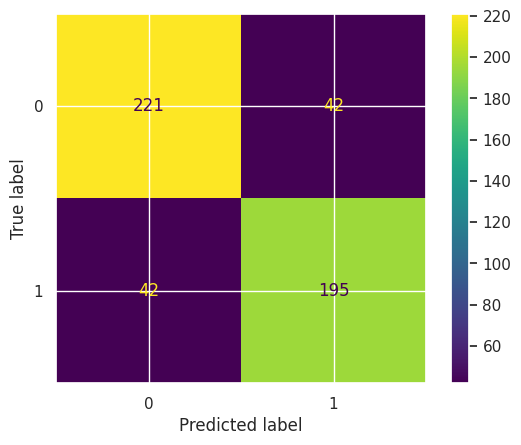

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
print(f"Accuracy: {accuracy:.5f}")